# Autoencoders - reproducing images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as ks

2024-05-24 12:52:57.549371: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 12:52:58.001842: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 12:52:58.004925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 12:52:59.436165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Functions, used for sample creation

In [2]:
class Sample_Circles:
    """Class creates images with circle pattern drawn inside and hold them in a list.
    Information about area of pattern and middle point coordinates is stored."""
    def __init__(self):
        self.images = [] # List that will hold generated images
        self.image_size = [60, 60] # List that holds information about size of images to generate next.
        self.fill_color = [255, 255, 255] # List that holds color information for image background color 
        self.circle_color = [255, 128, 0] # List that holds color information for circle pattern color
        self.radius = [17, 17] # List that holds lower and upper limit of radius for circle pattern
        self.r = 17 # Radius of circle pattern for next image generated. Can be randomly chosen between
                    # limits stored in .radius property by calling .randomize_r method
        self.area = [] # List that holds information about surface area of circle pattern in images
        self.coordinates = [] # List that holds information about middle point coordinates of circle pattern
        self.area_color = [] # List that holds information about color of circle pattern
    
    def __set_radius_lower__(self, r):
        """Sets lower limit for circle radius."""
        self.radius[0] = r
    
    def __set_radius_upper__(self, r):
        """Sets upper limit for circle radius."""
        self.radius[1] = r
        
    def set_radius(self, lower=17, upper=17):
        """Function allows to set lower and upper limit for radius.
        Unmentioned limits will default to 17!"""
        self.__set_radius_lower__(lower)
        self.__set_radius_upper__(upper)
        self.randomize_r()
        
    def randomize_r(self):
        """Function will set .r property to random integer value between limits defined in .radius"""
        self.r = np.random.randint(low=self.radius[0], high=self.radius[1] + 1)
        
    def __set_size_x__(self, x):
        """Sets size of image for x-cooordinate direction."""
        self.image_size[0] = x
    
    def __set_size_y__(self, y):
        """Sets size of image for y-cooordinate direction."""
        self.image_size[1] = y
        
    def set_image_size(self, x=60, y=60):
        """Function allows to set size of next generated images.
        Unmentioned parameters will default to 60!"""
        self.__set_size_x__(x)
        self.__set_size_y__(y)
        
    def randomize_fill_color(self):
        """Function that will choose an arbitary background color for next image generation."""
        self.fill_color = np.random.randint(low=0, high=256, size=3).tolist()
        
    def randomize_circle_color(self):
        """Function that will choose an arbitary circle pattern color for next image generation."""
        self.circle_color = np.random.randint(low=0, high=256, size=3).tolist()    

    def __create_image_w_circle__(self):
        """ Creates a numpy array with three dimensions, which represents a color image.
        The image will hold a circle as pattern on an arbitary position.
        Size of image and circle, as well as the color of background and circle may be specified.
        Besides the image the position of the circle and its area is stored in the class object."""
        # Generating image with background color
        image = np.full(shape=(self.image_size[0], self.image_size[1], 3), fill_value=self.fill_color)
        # Determing coordinates for center of circle
        coord_x = np.random.randint(low=self.r + 1, high=(self.image_size[0] - self.r - 1))
        coord_y = np.random.randint(low=self.r + 1, high=(self.image_size[1] - self.r - 1))

        # Creating a meshgrid of image size and than calculate from that, whether position is in circle
        mesh = np.meshgrid(range(self.image_size[1]), range(self.image_size[0]))
        mesh[0] -= coord_y
        mesh[1] -= coord_x
        mask = np.sqrt(mesh[0]**2 + mesh[1]**2) < self.r
        # Filling circle in the image by specifying its color value on all three layers
        image[mask, :] = self.circle_color
        
        # Storing results
        self.images.append(image) # store generated image
        self.area.append(np.pi*self.r**2) # store information about surface area size
        self.coordinates.append([coord_x, coord_y]) # store information about location of circle pattern
        self.area_color.append(self.circle_color)
        
    def append_random_circles(self, n):
        """Will append n new images with circles with random radius 
        (within radius limits in .radius property)."""
        for _ in range(n):
            self.randomize_r() # For random radius size for every image
            self.__create_image_w_circle__() # call image creation
            
    def __erase_area_color(self, a=None, b=None):
        """Erases area_color between a (included) and b (excluded). If a and b are not given,
        whole area_color stack is erased. Counting from zero (index counting)"""        
        if ((a == None) & (b == None)):
            self.area_color.clear() # clear all in case no arguements were given
        elif (b == None):
            del self.area_color[a:] # clear index a and all behind, if only a is given
        elif (a == None):
            del self.area_color[:b] # clear all up to index b (excluded), if only b is given
        else:
            del self.area_color[a:b] # clear between index a (incl.) and b (excl.) if both are given  
            
    def __erase_area__(self, a=None, b=None):
        """Erases area between a (included) and b (excluded). If a and b are not given,
        whole image stack is erased. Counting from zero (index counting)"""        
        if ((a == None) & (b == None)):
            self.area.clear() # clear all in case no arguements were given
        elif (b == None):
            del self.area[a:] # clear index a and all behind, if only a is given
        elif (a == None):
            del self.area[:b] # clear all up to index b (excluded), if only b is given
        else:
            del self.area[a:b] # clear between index a (incl.) and b (excl.) if both are given        
            
    def __erase_coordinates__(self, a=None, b=None):
        """Erases coordinates between a (included) and b (excluded). If a and b are not given,
        whole image stack is erased. Counting from zero (index counting)"""        
        if ((a == None) & (b == None)):
            self.coordinates.clear() # clear all in case no arguements were given
        elif (b == None):
            del self.coordinates[a:] # clear index a and all behind, if only a is given
        elif (a == None):
            del self.coordinates[:b] # clear all up to index b (excluded), if only b is given
        else:
            del self.coordinates[a:b] # clear between index a (incl.) and b (excl.) if both are given 
            
    def erase_images(self, a=None, b=None):
        """Erases images between a (included) and b (excluded). If a and b are not given,
        whole image stack is erased. Counting from zero (index counting)"""
        if ((a == None) & (b == None)):
            self.images.clear() # clear all in case no arguements were given
        elif (b == None):
            del self.images[a:] # clear index a and all behind, if only a is given
        elif (a == None):
            del self.images[:b] # clear all up to index b (excluded), if only b is given
        else:
            del self.images[a:b] # clear between index a (incl.) and b (excl.) if both are given
        # Erase corresponding area and coordinate information
        self.__erase_area__(a, b)
        self.__erase_coordinates__(a, b)
    
    def normalized_images(self, a=None, b=None):
        """Exports images with values normalized between 0 and 1 as a numpy arary
        of shape (len(self.images), self.image_size[0], self.image_size[1], 3)"""
        if ((a == None) & (b == None)):
            return np.array(self.images[:]) / 255 # return all in case no arguements were given
        elif (b == None):
            return np.array(self.images[a:]) / 255 # return index a and all behind, if only a is given
        elif (a == None):
            return np.array(self.images[:b]) / 255 # return all up to index b (excluded), if only b is given
        else:
            return np.array(self.images[a:b]) / 255 # return between index a (incl.) and b (excl.) if both are given
    
    def normalized_areas(self, a=None, b=None):
        """Exports surface area information of circle pattern normalized to values from 0 to 1
        in a numpy array"""
        areas = np.array(self.area) # create numpy array from self.area
        max_value = areas.max() # Determin max value in area 
        if (a == None and b == None):
            # return all in case no arguements were given
            return areas[:] / max_value 
        elif (b == None):
            # return index a and all behind, if only a is given
            return areas[a:] / max_value 
        elif (a == None):
            # return all up to index b (excluded), if only b is given
            return areas[:b] / max_value 
        else:
            # return between index a (incl.) and b (excl.) if both are given
            return areas[a:b] / max_value 
        
        
class Corresponding_Squares_Circles(Sample_Circles):
    """Class is intended to be used to generate images with circles and enable generation of
    corresponding images with squares at same position and same surface area."""
    
    def __init__(self):
        """Initialization of storage for images with squares and its sizes."""
        super().__init__()
        self.images_squares = []
        self.area_squares = []
    
    def __create_image_w_square__(self, coord_x, coord_y, sq_area=30, sq_color=[255, 128, 0]):
        """Creates a numpy array with three dimensions, which represents an color image.
        The picture will hold a square on an arbitary position.
        Size of image and square, as well as the color of background and square my be specified.
        Besides the image the position of the square (its center position) and its area in pixels is returned"""
        # Generating image with background color
        image = np.full(shape=(self.image_size[0], self.image_size[1], 3), fill_value=self.fill_color)
        
        # Calculating boundary coordinates from middle point coordinates and desired square size
        sq_edgelength = np.sqrt(sq_area).round(0).astype('int')
        x_edge = (coord_x - sq_edgelength // 2).astype('int')
        y_edge = (coord_y - sq_edgelength // 2).astype('int')
            
        # Checking, if square of desired size fits completly in image at desired position
        assert (x_edge > 0 and (x_edge + sq_edgelength) < self.image_size[0]), 'x-coordinate out of limit'
        assert (y_edge > 0 and (y_edge + sq_edgelength) < self.image_size[1]), 'y-coordinate out of limit'
        
        # Filling square in the image by scpecifying its color value on all three layers        
        image[x_edge:x_edge + sq_edgelength, y_edge:y_edge + sq_edgelength, :] = sq_color
        
        # Storing images and area information
        self.images_squares.append(image)
        self.area_squares.append(sq_edgelength**2)

    def add_images_squares(self):
        """This function allows to generate a corresponding image with a square pattern for every image
        stored containing a circle pattern. At every call previously generated images are erased."""
        self.erase_squares()
        for i, value in enumerate(self.coordinates):
            self.__create_image_w_square__(value[0], value[1], self.area[i], self.area_color[i])
            
    def erase_squares(self):
        """ Erases all stored images with square pattern."""
        self.images_squares.clear()
        self.area_squares.clear()
    
    def normalizes_images_squares(self, a=None, b=None):
        """Exports images with values normalized between 0 and 1 as a numpy arary
        of shape (len(self.images_squares), self.image_size[0], self.image_size[1], 3)"""
        if (a == None and b == None):
            # return all in case no arguements were given
            return np.array(self.images_squares[:]) / 255 
        elif (b == None):
            # return index a and all behind, if only a is given
            return np.array(self.images_squares[a:]) / 255 
        elif (a == None):
            # return all up to index b (excluded), if only b is given
            return np.array(self.images_squares[:b]) / 255 
        else:
            # return between index a (incl.) and b (excl.) if both are given
            return np.array(self.images_squares[a:b]) / 255 
        
    def normalized_areas_squares(self, a=None, b=None):
        """Exports surface area information of square pattern normalized to values from 0 to 1
        in a numpy array"""
        areas = np.array(self.area_squares) # create numpy array from self.area_squares
        max_value = areas.max() # Determin max value in area 
        if (a == None and b == None):
            # return all in case no arguements were given
            return areas[:] / max_value 
        elif (b == None):
            # return index a and all behind, if only a is given
            return areas[a:] / max_value 
        elif (a == None):
            # return all up to index b (excluded), if only b is given
            return areas[:b] / max_value 
        else:
            # return between index a (incl.) and b (excl.) if both are given
            return areas[a:b] / max_value 

## Autoencoder without bottlenec (for testing)

In [3]:
# Generate Samples with random circles: 50 Samples of 50x50 images 
Samples = Sample_Circles()
Samples.set_radius(3, 20)
Samples.set_image_size(50, 50)
Samples.append_random_circles(50)
# Define training data set as normalized images
y_train = Samples.normalized_images()
# For autoencoder is input data same to target data!
y_target = y_train.copy()

In [4]:
# Defining net with multible channels in hidden layer and three channel output layer
Net = ks.Sequential()
Net.add(ks.layers.Conv2D(10, kernel_size=(3, 3), input_shape=(50, 50, 3), 
                         padding='same', activation='sigmoid'))
Net.add(ks.layers.Conv2D(3, kernel_size=(1, 1), padding='same', activation='linear'))
Net.compile(loss='mean_squared_error', optimizer='adam')

# Store history of loss-function in
history_buffer_loss = []

In [10]:
# Fit autoencoder model
history = Net.fit(y_train, y_target, batch_size=50, epochs=300, verbose=0)
# Add new information about loss function to buffer and plot it
history_buffer_loss += history.history['loss']

Text(0.5, 0.98, 'Loss function')

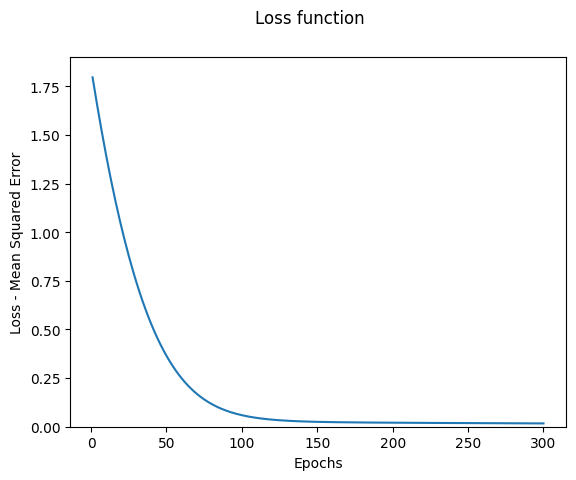

In [11]:
# Plotting loss function
fig, ax = plt.subplots()
ax.set_ylim(bottom=0, top=np.max(history_buffer_loss).round(1) + 0.1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss - Mean Squared Error')
ax.plot(list(range(1, len(history_buffer_loss) + 1)), history_buffer_loss)
fig.suptitle('Loss function')

1/1 [==============================] - 0s 84ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


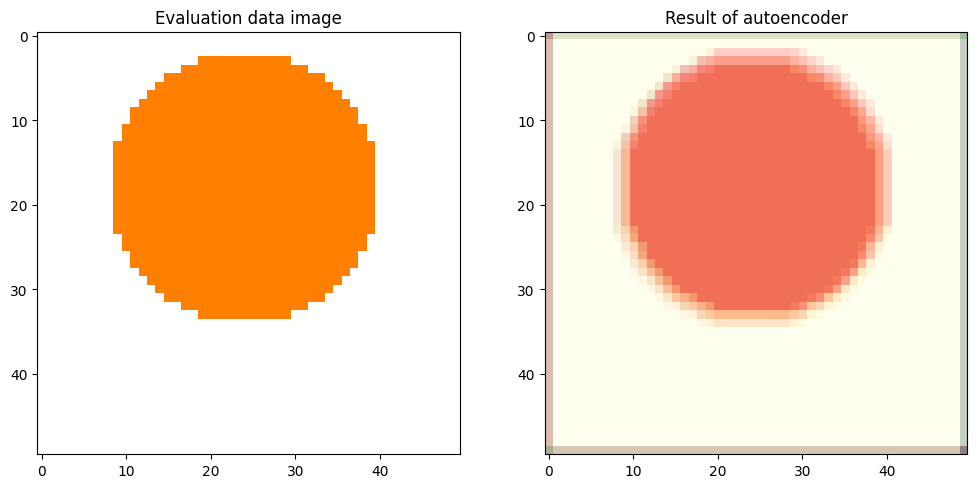

In [12]:
Samples_eval = Sample_Circles()
Samples_eval.set_radius(3, 20)
Samples_eval.set_image_size(50, 50)
Samples_eval.append_random_circles(5)
samples_eval = Samples_eval.normalized_images()
results_eval = Net.predict(samples_eval)
# Comparing example images (images index i)
i = 3
fig, axs = plt.subplots(1, 2, figsize=(12, 26))
axs[0].set_title('Evaluation data image')
axs[1].set_title('Result of autoencoder')
axs[0].imshow(samples_eval[i], label='Evaluation data image')
axs[1].imshow(results_eval[i], label='Result of autoencoder')

## Training autoencoder with bottleneck

### Sample generation, 27x27 pixels

In [3]:
# Pictures with just one output layer (gray image)
Samples_2 = Sample_Circles()
Samples_2.set_image_size(27, 27)
Samples_2.set_radius(1, 8)
Samples_2.circle_color = [0, 0, 0]
Samples_2.append_random_circles(30000)
Samples_27 = Samples_2.normalized_images()[:, :, :, 0][:, :, :, np.newaxis]
Samples_27_target = Samples_27.copy() # For autoencoders: target = input
Samples_27.shape

(30000, 27, 27, 1)

### Defining net with 9 neurons at smallest part

In [6]:
Net_2 = ks.Sequential()
# Variable activation function
activ = 'selu'


Net_2.add(ks.layers.Conv2D(12, 5, input_shape=(27, 27, 1), activation=activ, padding='same'))
Net_2.add(ks.layers.AveragePooling2D(pool_size=(3, 3), padding='same')) # From 27x27 to 9x9
Net_2.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_2.add(ks.layers.AveragePooling2D(pool_size=(3, 3), padding='same')) # From 9x9 to 3x3
Net_2.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_2.add(ks.layers.AveragePooling2D(pool_size=(3, 3), padding='same')) # From 3x3 to 1x1
Net_2.add(ks.layers.Conv2D(9, 3, activation=activ, padding='same')) # Bottlenec, 9 channels on 1x1 
Net_2.add(ks.layers.UpSampling2D(size=(3, 3))) # From 1x1 to 3x3
Net_2.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_2.add(ks.layers.UpSampling2D(size=(3, 3))) # From 3x3 to 9x9
Net_2.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_2.add(ks.layers.UpSampling2D(size=(3, 3))) # From 9x9 to 27x27
Net_2.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_2.add(ks.layers.Conv2D(1, 2, activation='linear', padding='same'))

Net_2.compile(loss='mean_squared_error', optimizer='adam')

# Store history of loss-function in
history_buffer_loss_2 = []
Net_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 12)        312       
                                                                 
 average_pooling2d (Average  (None, 9, 9, 12)          0         
 Pooling2D)                                                      
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 12)          3612      
                                                                 
 average_pooling2d_1 (Avera  (None, 3, 3, 12)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 12)          3612      
                                                                 
 average_pooling2d_2 (Avera  (None, 1, 1, 12)         

### Train net

In [8]:
history = Net_2.fit(Samples_27, Samples_27_target, batch_size=5, epochs=20, verbose=0)
# Add new information about loss function to buffer and plot it
history_buffer_loss_2 += history.history['loss']

### Display example of training data

938/938 [==============================] - 10s 10ms/step


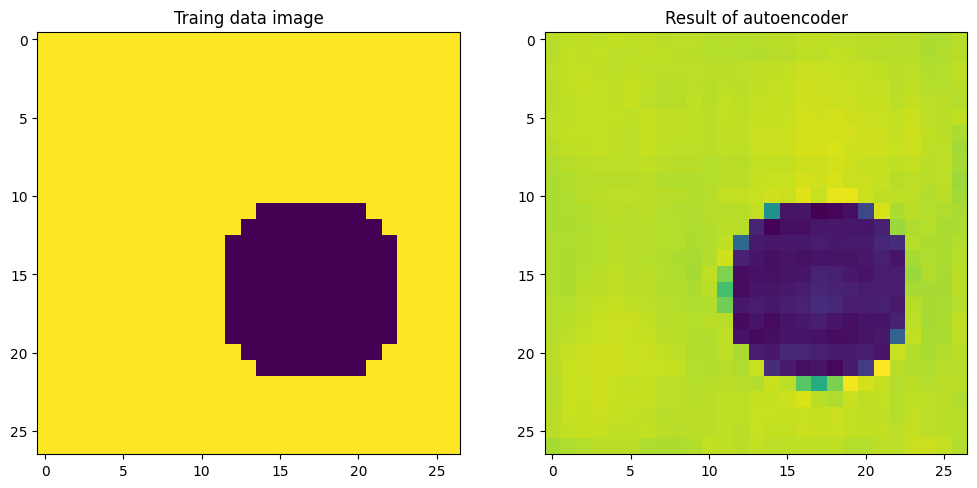

In [10]:
y_predict = Net_2.predict(Samples_27)
# Comparing example images (images index i)
i = 5
fig, axs = plt.subplots(1, 2, figsize=(12, 26))
axs[0].set_title('Traing data image')
axs[1].set_title('Result of autoencoder')
axs[0].imshow(Samples_27[i], label='Training data image')
axs[1].imshow(y_predict[i], label='Result of autoencoder')

###  Display one evaluation sample and output of autoencoder

1/1 [==============================] - 0s 22ms/step


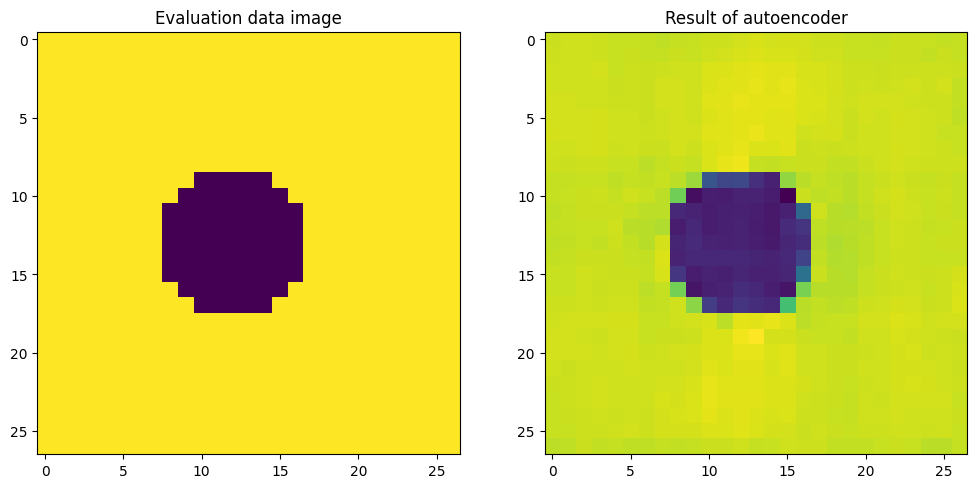

In [12]:
Samples_2.append_random_circles(1)
eval_sample = Samples_2.normalized_images()[-1]
Samples_2.erase_images(a=30000)
eval_sample = eval_sample[:, :, 0][np.newaxis, :, :, np.newaxis]
result = Net_2.predict(eval_sample)
# Plotting this eval sample
fig, axs = plt.subplots(1, 2, figsize=(12, 26))
axs[0].set_title('Evaluation data image')
axs[1].set_title('Result of autoencoder')
axs[0].imshow(eval_sample[0], label='Evaluation data image')
axs[1].imshow(result[0], label='Result of autoencoder')

# Training autoencoder to turn circle pattern into squares

### Sample creation

In [4]:
# Using color images this time (color of pattern same for all samples)
Samples_3 = Corresponding_Squares_Circles()
Samples_3.set_image_size(27, 27)
Samples_3.set_radius(1, 8)
Samples_3.append_random_circles(5000)
Circles_train = Samples_3.normalized_images()
Samples_3.add_images_squares()
Squares_target = Samples_3.normalizes_images_squares()

### Definition of autoencoder

In [5]:
# 1. Ansatz: Use same net structure as for autoencoder for reproduction of images (see task befor)
Net_3 = ks.Sequential()
activ = 'selu'

Net_3.add(ks.layers.Conv2D(12, 5, input_shape=(27, 27, 3), activation=activ, padding='same'))
Net_3.add(ks.layers.AveragePooling2D(pool_size=(3, 3), padding='same')) # From 27x27 to 9x9
Net_3.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_3.add(ks.layers.AveragePooling2D(pool_size=(3, 3), padding='same')) # From 9x9 to 3x3
Net_3.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_3.add(ks.layers.AveragePooling2D(pool_size=(3, 3), padding='same')) # From 3x3 to 1x1
Net_3.add(ks.layers.Conv2D(9, 3, activation=activ, padding='same')) # Bottlenec, 9 channels on 1x1 
Net_3.add(ks.layers.UpSampling2D(size=(3, 3))) # From 1x1 to 3x3
Net_3.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_3.add(ks.layers.UpSampling2D(size=(3, 3))) # From 3x3 to 9x9
Net_3.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_3.add(ks.layers.UpSampling2D(size=(3, 3))) # From 9x9 to 27x27
Net_3.add(ks.layers.Conv2D(12, 5, activation=activ, padding='same'))
Net_3.add(ks.layers.Conv2D(3, 2, activation='linear', padding='same'))

Net_3.compile(loss='mean_squared_error', optimizer='adam')

### Train the network
Use circles as data and corresponding squares as targets

In [6]:
# Train Model on training data set
history = Net_3.fit(Circles_train, Squares_target, batch_size=5, epochs=20, verbose=0)
# Print loss of last epoch
print(round(history.history['loss'][-1], 5))

0.00197


### Evaluate with generated evaluation data

In [7]:
# Create evaluation data set and evaluate 
Samples_3.append_random_circles(10000)
Samples_3.add_images_squares()
circles_eval = Samples_3.normalized_images()[5000:]
squares_eval = Samples_3.normalizes_images_squares()[5000:]
Samples_3.erase_images(5000)
Samples_3.erase_squares()
# Run evaluation and display error
print(round(Net_3.evaluate(circles_eval, squares_eval), 5))

0.00271


Loss is approx. same as for training data!

### Display one evaluation sample and output of autoencoder


313/313 [==============================] - 4s 12ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


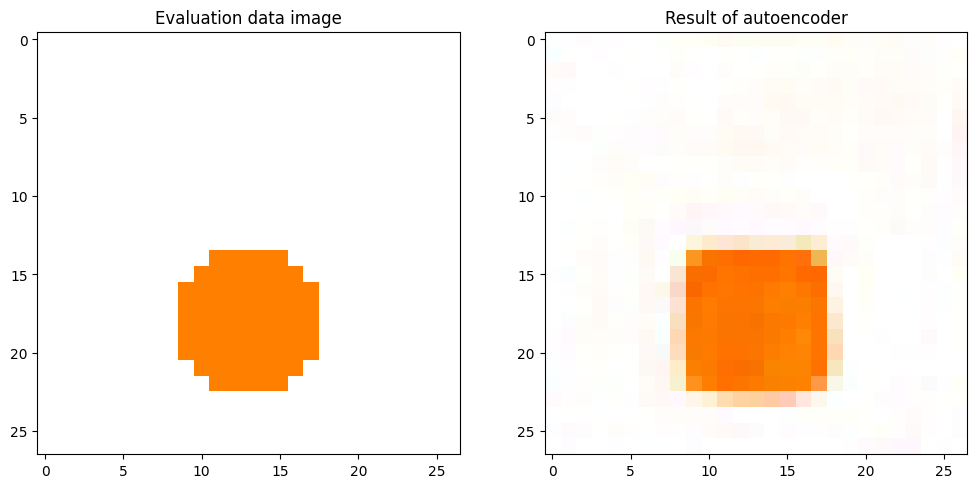

In [11]:
# Run prediction on evaluation data set
squares_predicted = Net_3.predict(circles_eval)
i = 1
fig, axs = plt.subplots(1, 2, figsize=(12, 26))
axs[0].set_title('Evaluation data image')
axs[1].set_title('Result of autoencoder')
axs[0].imshow(circles_eval[i], label='Evaluation data image')
axs[1].imshow(squares_predicted[i], label='Result of autoencoder')